# 数据可视化：matplotlib、seaborn

###### 用 Python 进行数据分析，就需要在项目初期开始进行探索性的数据分析，这样方便你对数据有一定的了解。其中最直观的就是采用数据可视化技术，这样，数据不仅一目了然，而且更容易被解读。同样在数据分析得到结果之后，我们还需要用到可视化技术，把最终的结果呈现出来。

### 可视化视图都有哪些？

###### 按照数据之间的关系，我们可以把可视化视图划分为 4 类，它们分别是比较、联系、构成和分布。我来简单介绍下这四种关系的特点：
###### 1、比较：比较数据间各类别的关系，或者是它们随着时间的变化趋势，比如折线图；
###### 2、联系：查看两个或两个以上变量之间的关系，比如散点图；
###### 3、构成：每个部分占整体的百分比，或者是随着时间的百分比变化，比如饼图；
###### 4、分布：关注单个变量，或者多个变量的分布情况，比如直方图。

接下来主要介绍常用的 10 种视图，这些视图包括了散点图、折线图、直方图、条形图、箱线图、饼图、热力图、蜘蛛图、二元变量分布和成对关系。

###### 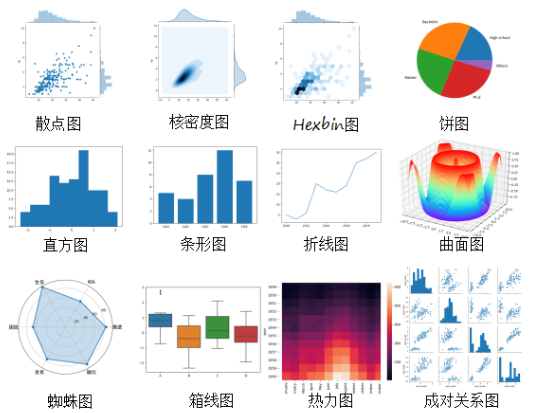

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from matplotlib.font_manager import FontProperties

###### 1、散点图

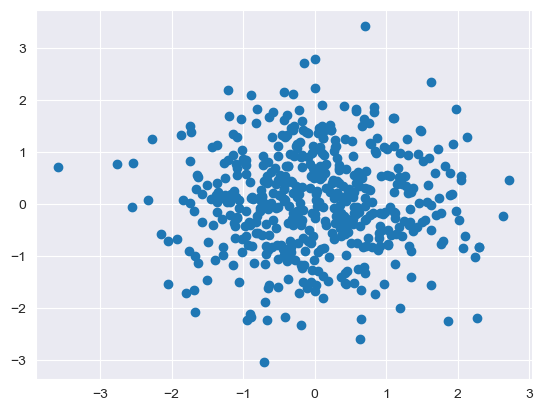

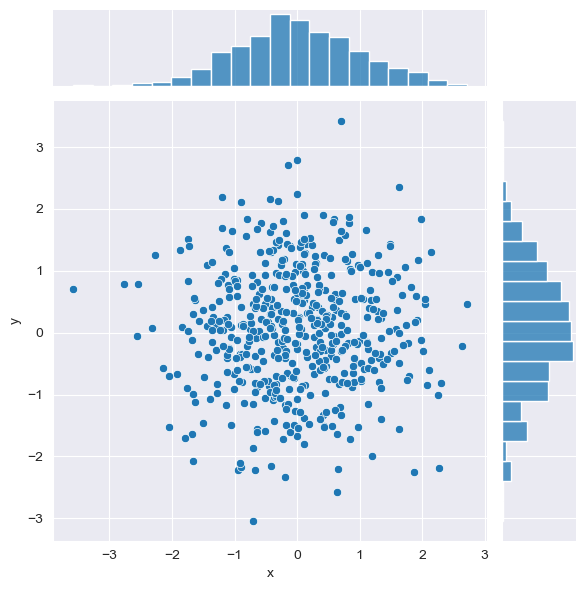

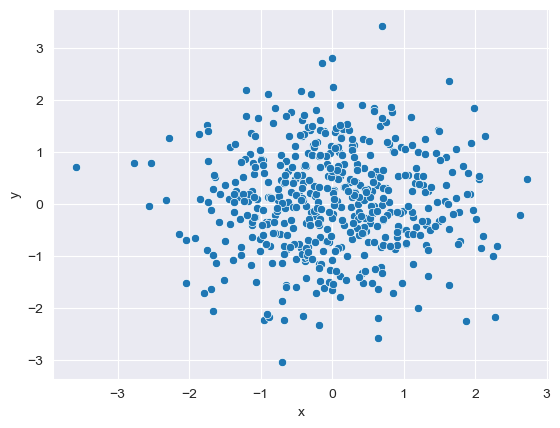

In [15]:
# 散点图
def scatter():
	# 数据准备
	N = 500
	x = np.random.randn(N)
	y = np.random.randn(N)
	# 用Matplotlib画散点图
	plt.scatter(x, y,marker='x')
	plt.show()
	# 用Seaborn画散点图
	df = pd.DataFrame({'x': x, 'y': y})
	sns.jointplot(x="x", y="y", data=df, kind='scatter');
	plt.show()

	# 也可以使用sns.scatterplot绘制散点图
	sns.scatterplot(x='x', y='y', data=df)
	plt.show()
scatter()

散点图的英文叫做 scatter plot，它将两个变量的值显示在二维坐标中，非常适合展示两个变量之间的关系

###### 2、折线图

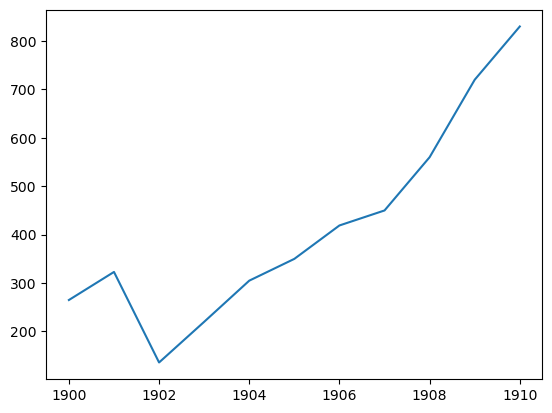

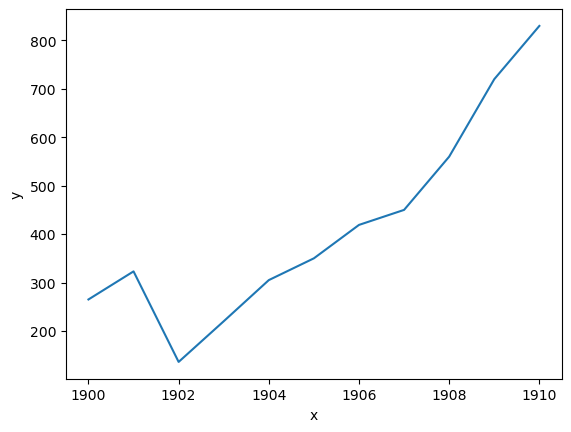

In [3]:
# 折线图
def line_chart():
	# 数据准备
	x = [1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910]
	y = [265, 323, 136, 220, 305, 350, 419, 450, 560, 720, 830]
	# 使用Matplotlib画折线图
	plt.plot(x, y)
	plt.show()
	# 使用Seaborn画折线图
	df = pd.DataFrame({'x': x, 'y': y})
	sns.lineplot(x="x", y="y", data=df)
	plt.show()
line_chart()

折线图可以用来表示数据随着时间变化的趋势

###### 3、条形图

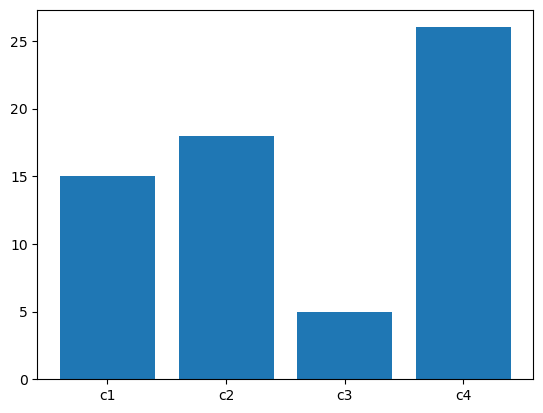

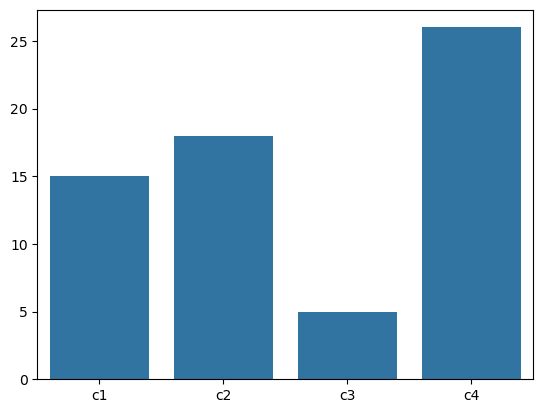

In [4]:
# 条形图
def bar_chart():
	# 数据准备
	x = ['c1', 'c2', 'c3', 'c4']
	y = [15, 18, 5, 26]
    
	# 用Matplotlib画条形图
	plt.bar(x, y)
	plt.show()
    
	# 用Seaborn画条形图
	sns.barplot(x=x, y=y) # 新版seaborn中必须显示指定x=xxx，y=xxx
	plt.show()
  

bar_chart()

通过直方图可以看到变量的数值分布，那么条形图可以帮我们查看类别的特征。在条形图中，长条形的长度表示类别的频数，宽度表示类别

###### 4、直方图

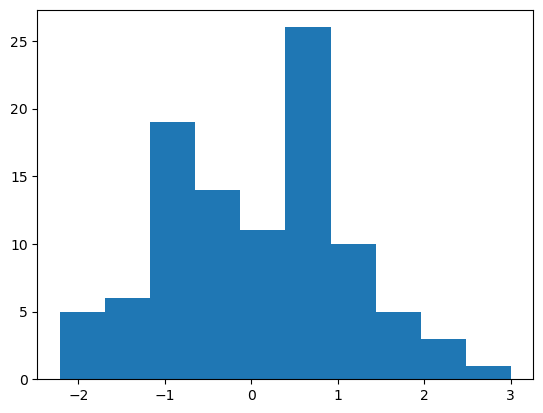

C:\Users\jikeyang\AppData\Local\Temp\ipykernel_8352\2613504478.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, kde=False)  # 新版seaborn中，使用 histplot() 代替 distplot() 就可以解决弃用警告问题，并且功能完全相同


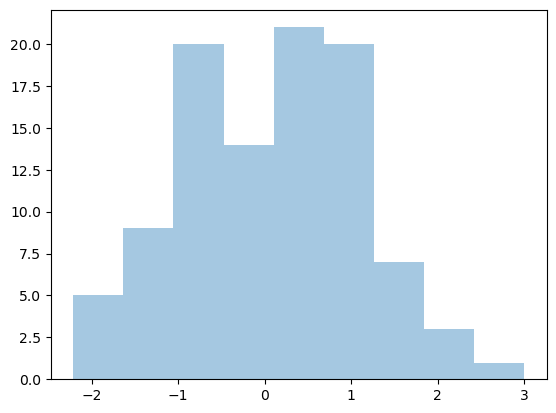

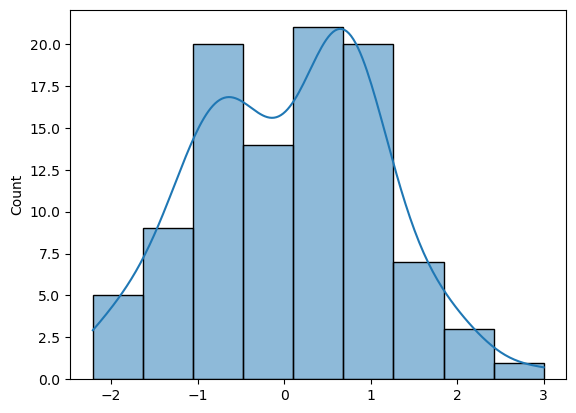

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 数据准备
a = np.random.randn(100)
s = pd.Series(a) 
# 用Matplotlib画直方图
plt.hist(s)
plt.show()

# 用Seaborn画直方图
sns.distplot(s, kde=False)  # 新版seaborn中，使用 histplot() 代替 distplot() 就可以解决弃用警告问题，并且功能完全相同
plt.show()
sns.histplot(s, kde=True)
plt.show()

###### 5、箱线图

C:\Users\jikeyang\AppData\Local\Temp\ipykernel_8352\606052808.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,labels=labels)  # 新版matplotlib中，使用tick_labels替换labels可避免警告问题


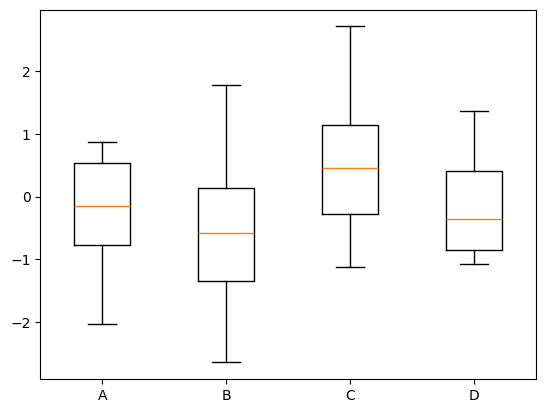

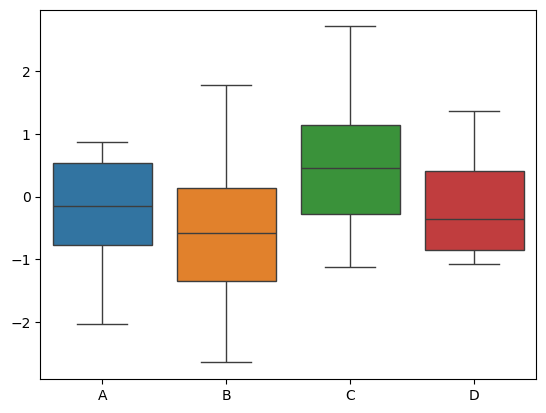

In [6]:
def box_plots():
	# 数据准备
	# 生成0-1之间的10*4维度数据
	data=np.random.normal(size=(10,4)) 
	labels = ['A','B','C','D']
	# 用Matplotlib画箱线图
	plt.boxplot(data,labels=labels)  # 新版matplotlib中，使用tick_labels替换labels可避免警告问题
	plt.show()
	# 用Seaborn画箱线图
	df = pd.DataFrame(data, columns=labels)
	sns.boxplot(data=df)
	plt.show()
box_plots()

箱线图，又称盒式图，它是在 1977 年提出的，由五个数值点组成：最大值 (max)、最小值 (min)、中位数 (median) 和上下四分位数 (Q3, Q1)。它可以帮我们分析出数据的差异性、离散程度和异常值等。

###### 6、饼图

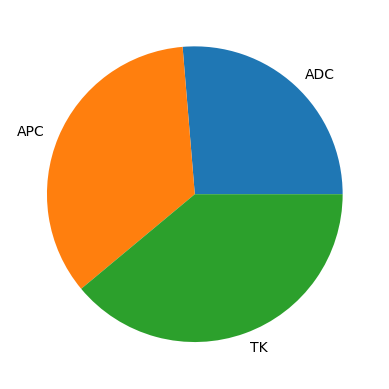

In [7]:
# 饼图
def pie_chart():
	# 数据准备
	nums = [25, 33, 37]
	# 射手adc：法师apc：坦克tk
	labels = ['ADC','APC', 'TK']
	# 用Matplotlib画饼图
	plt.pie(x = nums, labels=labels)
	plt.show()
pie_chart()

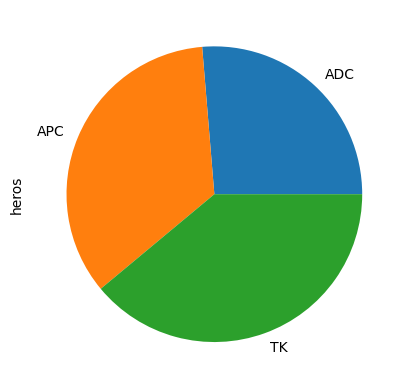

In [8]:
# 饼图
def pie_chart2():
	# 数据准备
	data = {}
	data['ADC'] = 25
	data['APC'] = 33
	data['TK'] = 37
	data = pd.Series(data)
	data.plot(kind = "pie", label='heros')
	plt.show()
pie_chart2()

饼图是常用的统计学模块，可以显示每个部分大小与总和之间的比例。

###### 7、热力图

Data array:
[[0.24851013 0.44997542 0.4109408 ]
 [0.26029969 0.87039569 0.18503993]
 [0.01966143 0.95325203 0.6804508 ]]


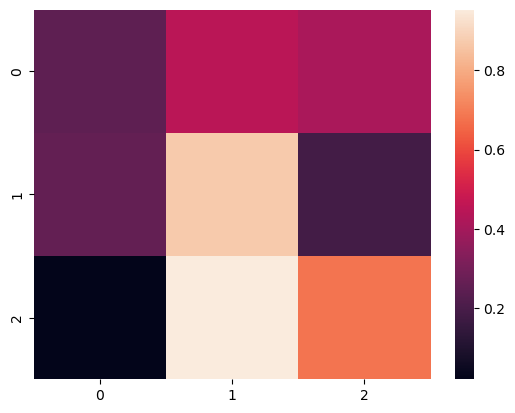

In [9]:
# 热力图
# 热力图
def thermodynamic():
	# 数据准备
	np.random.seed(33)
	data = np.random.rand(3, 3)
	
    # 打印数据
	print("Data array:")
	print(data)

	heatmap = sns.heatmap(data)
	plt.show()

thermodynamic()

热力图，英文叫 heat map，是一种矩阵表示方法，其中矩阵中的元素值用颜色来代表，不同的颜色代表不同大小的值。通过颜色就能直观地知道某个位置上数值的大小。热力图是一种非常直观的多元变量分析方法。

###### 我们一般使用 Seaborn 中的 sns.heatmap(data) 函数，其中 data 代表需要绘制的热力图数据。这里我们使用 Seaborn 中自带的数据集 flights，该数据集记录了 1949 年到 1960 年期间，每个月的航班乘客的数量。

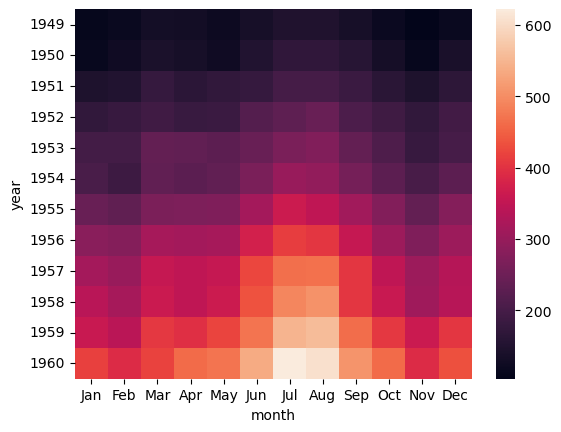

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
# 数据准备
flights = sns.load_dataset("flights")
data=flights.pivot(index='year',columns='month',values='passengers')  # 显示传参index（行）、columns（列）、values（数据来源）
# 用Seaborn画热力图
sns.heatmap(data)
plt.show()

通过 seaborn 的 heatmap 函数，我们可以观察到不同年份，不同月份的乘客数量变化情况，其中颜色越浅的代表乘客数量越多

###### 8、蜘蛛图

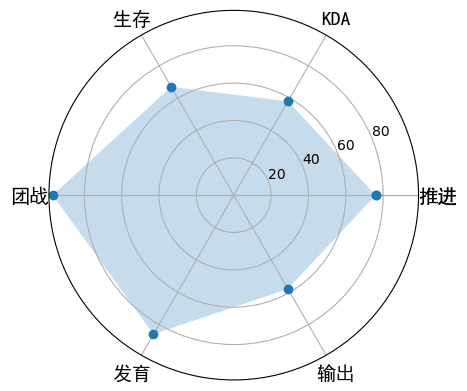

In [11]:
# 蜘蛛图
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
def spider_chart():
	# 数据准备
	labels=np.array([u"推进","KDA",u"生存",u"团战",u"发育",u"输出"])  # 创建一个 NumPy 数组 labels，存储雷达图的六个维度标签
	stats=[76, 58, 67, 97, 86, 58]  # 定义一个列表 stats，表示每个维度的评分值（0~100）
    
	# 画图数据准备，角度、状态值（此处concatenate的作用是用于闭合图形）
	angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)  # 生成 6个等距离角度，0, π/3, 2π/3, ..., 5π/3（endpoint表示不含2π）
	stats=np.concatenate((stats,[stats[0]]))  # 将 stats 的第一个值加到末尾，使图形闭合，即原始 stats = [76,58,67,97,86,58] → 拼接后变成 [76,58,67,97,86,58,76]
	labels = np.concatenate((labels,[labels[0]])) # 同理，将第一个标签也复制到末尾，与 stats 和 angles 保持长度一致
	angles=np.concatenate((angles,[angles[0]]))  # 同理，将第一个角度也加到末尾，确保角度与数据对齐。
    
	# 用Matplotlib画蜘蛛图
	fig = plt.figure()  # 创建一个新的图形窗口（Figure 对象）
	ax = fig.add_subplot(111, polar=True)   # 在图形中添加一个子图，并设置为极坐标系；111 表示“1行1列第1个子图”（即只有一个图）；polar=True 是关键！它启用极坐标模式，这是绘制雷达图的基础。
	ax.plot(angles, stats, 'o', linewidth=2)  # 在极坐标系中绘制折线图;angles是极角（θ），stats是极径（r）
	ax.fill(angles, stats, alpha=0.25)  # 填充雷达图内部区域。fill() 方法用颜色填充 (angles, stats) 构成的多边形。alpha=0.25 表示透明度为 25%，让背景和其他元素可见。
    
	# 设置中文字体
	# font = FontProperties(fname=r"C:\Windows\Fonts\simhei.ttf", size=14)  # 字体下载https://github.com/Haixing-Hu/latex-chinese-fonts
	font = FontProperties(fname="./SimHei.ttf", size=14) 
	ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties=font)  # 注意属性名称是 fontproperties
	plt.show()
    
spider_chart()

蜘蛛图是一种显示一对多关系的方法。在蜘蛛图中，一个变量相对于另一个变量的显著性是清晰可见的。蜘蛛图是一个圆形，你需要计算每个坐标的角度，然后对这些数值进行设置。当画完最后一个点后，需要与第一个点进行连线。

###### 9、二元变量分布图

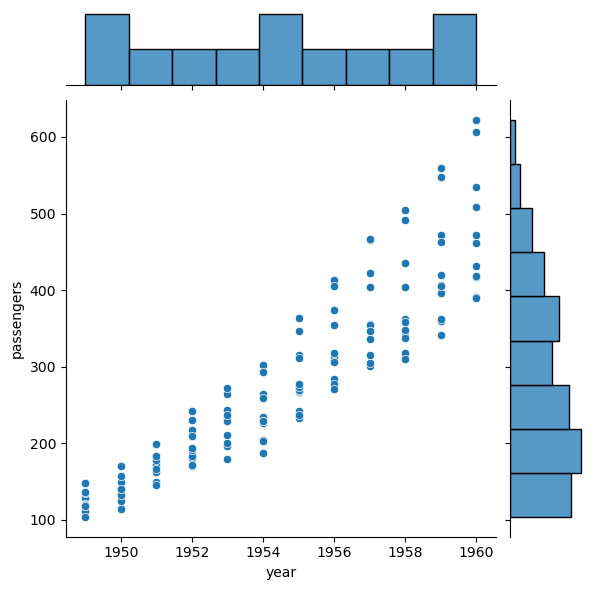

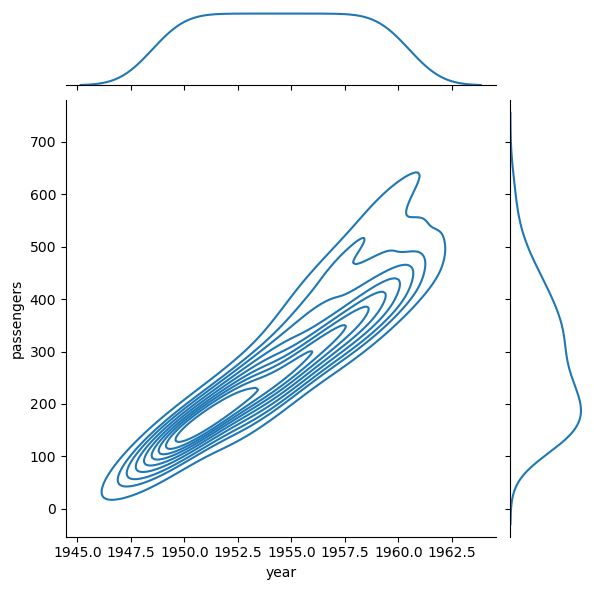

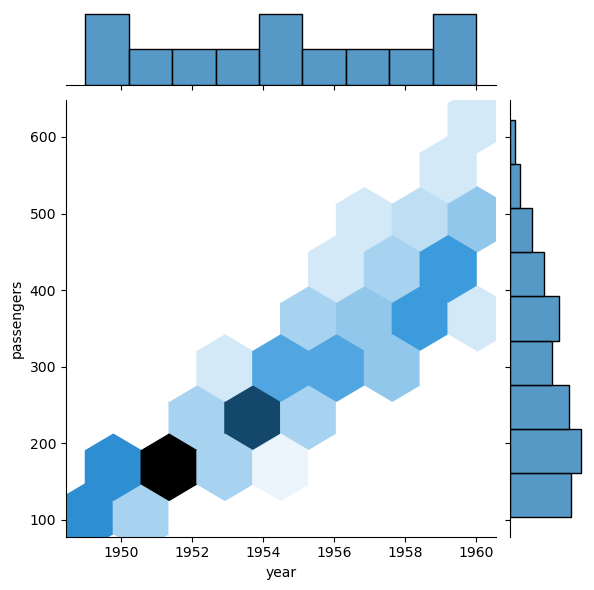

In [12]:
def jointplot():
	# 数据准备
	flights = sns.load_dataset("flights")
	# 用Seaborn画二元变量分布图（散点图，核密度图，Hexbin图）
	sns.jointplot(x="year", y="passengers", data=flights, kind='scatter')  # 散点图
	sns.jointplot(x="year", y="passengers", data=flights, kind='kde')  # 核密度图
	sns.jointplot(x="year", y="passengers", data=flights, kind='hex')  # Hexbin图
	plt.show()
jointplot()

我们想要看两个变量之间的关系，就需要用到二元变量分布。当然二元变量分布有多种呈现方式，开头给你介绍的散点图就是一种二元变量分布。

###### 10、成对关系图

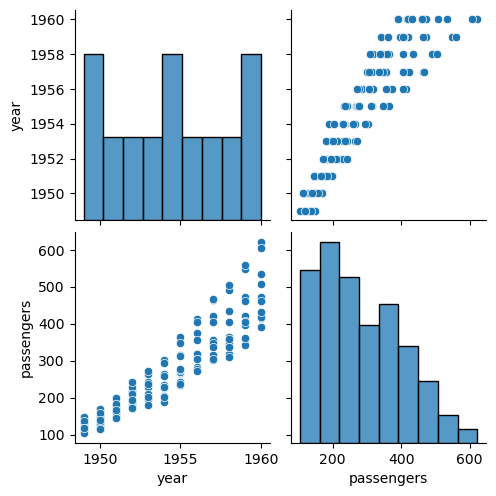

In [13]:
# 成对关系图
def pairplot():
	# 数据准备
	flights = sns.load_dataset('flights')
	# 用Seaborn画成对关系
	sns.pairplot(flights)  # pairplot 适合多维数值型数据（如鸢尾花的花萼长宽等），flights 数据中只有 passengers 是数值，year 是序数，month 是类别，所以 pairplot 并不适合这个数据集
	plt.show()
pairplot()

上面这张图相当于这2个变量两两之间的关系

     year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]
month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201
1954   204  188  235  227  234  264  302  293  259  229  203  229
1955   242  233  267  269  270  315  364  347  312  274  237  278
1956   284  277  317  313  318  374  413  405 

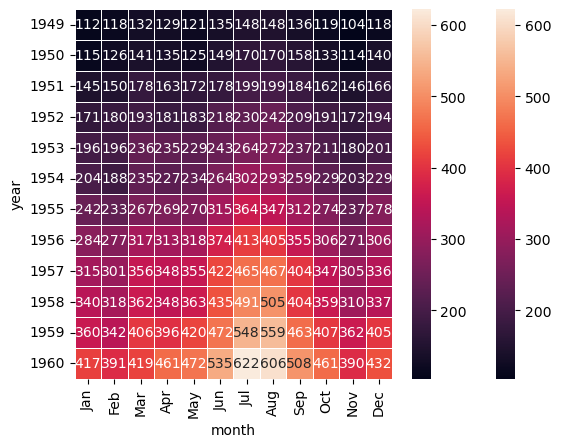

In [14]:
def thermodynamic2():
	flights = sns.load_dataset('flights')
	print(flights)
	flights=flights.pivot(index='year',columns='month',values='passengers') 
	print(flights)
	sns.heatmap(flights) #注意这里是直接传入数据集即可，不需要再单独传入x和y了
	sns.heatmap(flights,linewidth=.5,annot=True,fmt='d')
	plt.show()
thermodynamic2()

如果想要探索数据集中的多个成对双变量的分布，可以直接采用 sns.pairplot() 函数。它会同时展示出 DataFrame 中每对变量的关系，另外在对角线上，你能看到每个变量自身作为单变量的分布情况。它可以说是探索性分析中的常用函数，可以很快帮我们理解变量对之间的关系。pairplot 函数的使用，就像在 DataFrame 中使用 describe() 函数一样方便，是数据探索中的常用函数。

# 小结

######  上面介绍了Python 可视化工具包 Matplotlib 和 Seaborn 工具包的使用。Seaborn 是基于 Matplotlib 更加高级的可视化库。其中主要介绍10 种可视化视图，可以按照变量之间的关系对它们进行分类，这些关系分别是比较、联系、构成和分布。

关于本次 Python 可视化的学习，我希望你能掌握：

视图的分类，以及可以从哪些维度对它们进行分类；十种常见视图的概念，以及如何在 Python 中进行使用，都需要用到哪些函数；需要自己动手跑一遍案例中的代码，体验下 Python 数据可视化的过程。

###### 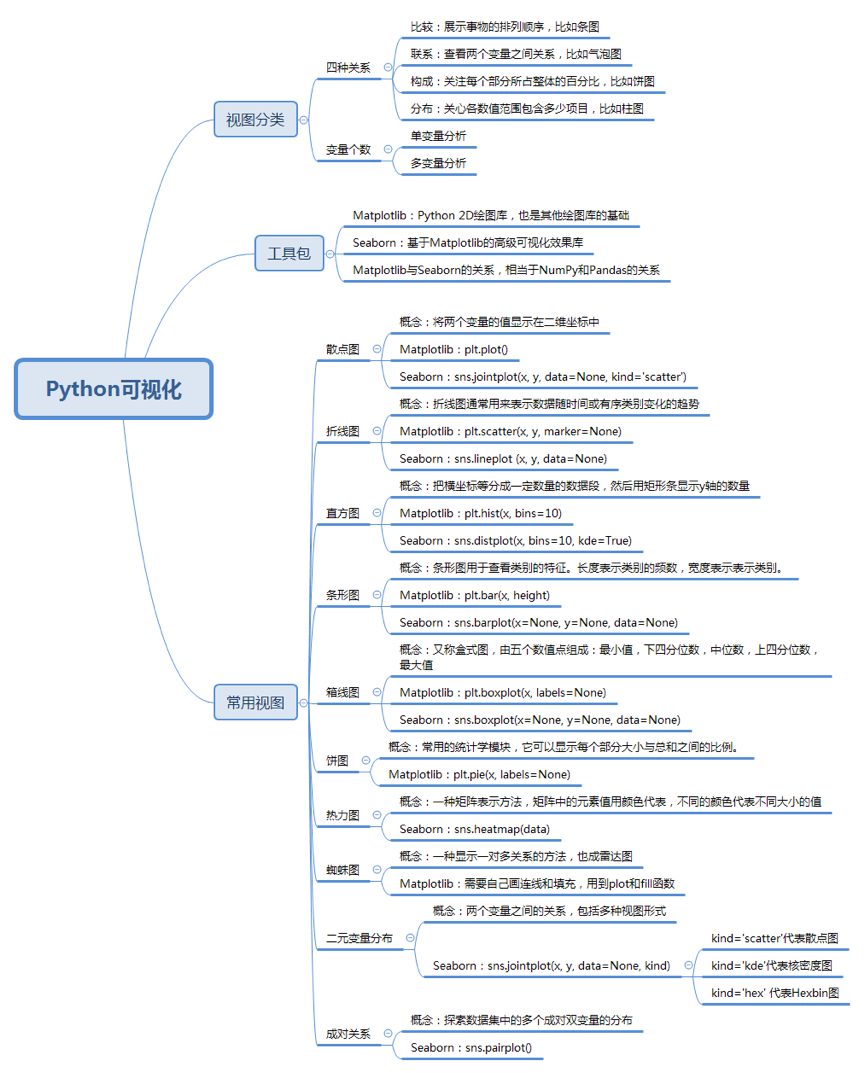